In [13]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.DataFrame(columns=['Saida','Tempo','n','Algoritmo'])

lista_program = ['./main','./random_local_search/main']
lista_programs=[]
for i in lista_program:
    lista_=[]
    for j in range(1,197):
        f = open(f'inputs_generator/in{j}.txt',"r")
        contents = f.read()
        f.close()
        n = contents.split()[0]
        m = contents.split()[1]
        start = time.perf_counter()
        proc = subprocess.run([i], input=contents, text=True, capture_output=True)
        end = time.perf_counter()
#             print('Saída:', proc.stdout)
        print("value", proc.stdout.split()[-1])
        print('Stderr:', proc.stderr)
        print('Tempo total(s):', end - start)
        dic = {
            'Tempo':float(end-start),
            'Saida':int(proc.stdout.split()[-1]),
            'n': int(n),
            'm': int(m)
        }
        lista_.append(dic)
    lista_programs.append(lista_)

value 6
Stderr: 
Tempo total(s): 0.010803550001583062
value 6
Stderr: 
Tempo total(s): 0.008931268999731401
value 2
Stderr: 
Tempo total(s): 0.009088230999623192
value 6
Stderr: 
Tempo total(s): 0.008412759998464026
value 8
Stderr: 
Tempo total(s): 0.009900409997499082
value 7
Stderr: 
Tempo total(s): 0.007717319000221323
value 8
Stderr: 
Tempo total(s): 0.011077881998062367
value 9
Stderr: 
Tempo total(s): 0.008589807999669574
value 10
Stderr: 
Tempo total(s): 0.007855748001020402
value 11
Stderr: 
Tempo total(s): 0.009236051999323536
value 11
Stderr: 
Tempo total(s): 0.008208314997318666
value 16
Stderr: 
Tempo total(s): 0.0081984399985231
value 14
Stderr: 
Tempo total(s): 0.008038979998673312
value 13
Stderr: 
Tempo total(s): 0.008549295002012514
value 13
Stderr: 
Tempo total(s): 0.008081976000539726
value 16
Stderr: 
Tempo total(s): 0.008109761998639442
value 16
Stderr: 
Tempo total(s): 0.008888563999789767
value 12
Stderr: 
Tempo total(s): 0.008738423999602674
value 19
Stderr: 
Te

value 111
Stderr: 
Tempo total(s): 0.018004022000241093
value 98
Stderr: 
Tempo total(s): 0.010149921999982325
value 114
Stderr: 
Tempo total(s): 0.01303211599952192
value 110
Stderr: 
Tempo total(s): 0.01639746300133993
value 121
Stderr: 
Tempo total(s): 0.015377646999695571
value 110
Stderr: 
Tempo total(s): 0.0135767349966045
value 116
Stderr: 
Tempo total(s): 0.011457254000561079
value 102
Stderr: 
Tempo total(s): 0.01188110300063272
value 113
Stderr: 
Tempo total(s): 0.01644226100324886
value 111
Stderr: 
Tempo total(s): 0.018188443002145505
value 113
Stderr: 
Tempo total(s): 0.011450623998825904
value 118
Stderr: 
Tempo total(s): 0.014544371999363648
value 121
Stderr: 
Tempo total(s): 0.012881292001111433
value 106
Stderr: 
Tempo total(s): 0.01133293800012325
value 116
Stderr: 
Tempo total(s): 0.01606068599721766
value 120
Stderr: 
Tempo total(s): 0.013362396999582415
value 126
Stderr: 
Tempo total(s): 0.02229957100280444
value 115
Stderr: 
Tempo total(s): 0.013420662999124033
va

value 11
Stderr: 
Tempo total(s): 0.03982195199932903
value 12
Stderr: 
Tempo total(s): 0.06775444400045672
value 11
Stderr: 
Tempo total(s): 0.03793597900221357
value 10
Stderr: 
Tempo total(s): 0.025906953997036908
value 9
Stderr: 
Tempo total(s): 0.016159286999027245
value 11
Stderr: 
Tempo total(s): 0.01894571599768824
value 9
Stderr: 
Tempo total(s): 0.02747205100240535
value 10
Stderr: 
Tempo total(s): 0.06662630200298736
value 13
Stderr: 
Tempo total(s): 0.04353651899873512
value 10
Stderr: 
Tempo total(s): 0.06175492499824031
value 15
Stderr: 
Tempo total(s): 0.04842575799921178
value 10
Stderr: 
Tempo total(s): 0.03722542600007728
value 8
Stderr: 
Tempo total(s): 0.03559572000085609
value 11
Stderr: 
Tempo total(s): 0.04032938399905106
value 7
Stderr: 
Tempo total(s): 0.024332060002052458
value 14
Stderr: 
Tempo total(s): 0.0482339949994639
value 8
Stderr: 
Tempo total(s): 0.05142789299861761
value 14
Stderr: 
Tempo total(s): 0.066443010000512
value 6
Stderr: 
Tempo total(s): 

In [14]:
for i in range(len(lista_programs)):
    for j in lista_programs[i]:
        if i == 0:
            alg = 'Smith'
        else:
            alg = 'Random Search'
        j['Algoritmo'] = alg
        df = df.append(j, ignore_index = True);

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_35179/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [15]:
df

,Saida,Tempo,n,Algoritmo,m
0,6,0.010804,4,Smith,9.0
1,6,0.008931,5,Smith,18.0
2,2,0.009088,6,Smith,11.0
3,6,0.008413,7,Smith,7.0
4,8,0.0099,8,Smith,40.0
...,...,...,...,...,...
387,13,0.198491,195,Random Search,811.0
388,9,0.090592,196,Random Search,556.0
389,9,0.139129,197,Random Search,845.0
390,9,0.086622,198,Random Search,513.0


In [16]:
df= df.apply(pd.to_numeric,errors="ignore")

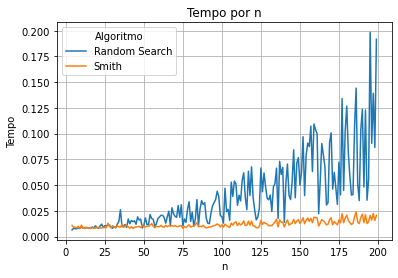

In [17]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo");
plt.grid();

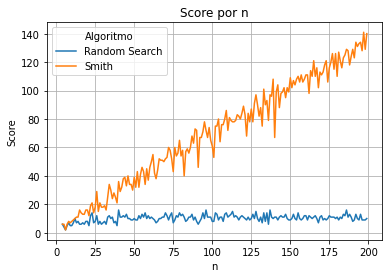

In [18]:
# df = df.loc[df['n']<100]
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");
# for i in np.arange(0,len(df),5):
#     plt.annotate(str(df.iloc[i]["m"]),xy=(df.iloc[i]["n"],df.iloc[i]["Tempo"]))




### Analisando variações no tempo do algoritmo smith

In [19]:
def plot_corr(x_,y_,title):
    sns.regplot(x_,y_, color=('#a29bec'))
    plt.title(title)
    plt.grid(True)
    plt.show()

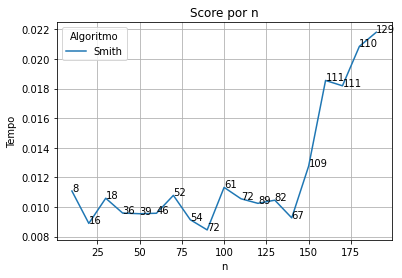

In [20]:
df_teste = df.loc[(df['n']<500) & (df['Algoritmo']== 'Smith') & (df['n']%10 == 0) ]

df_teste.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Tempo");
for i in np.arange(0,len(df_teste),1):
    plt.annotate(str(df_teste.iloc[i]["Saida"]),xy=(df_teste.iloc[i]["n"],df_teste.iloc[i]["Tempo"]))

### Correlação da diferença |n-m| e o tempo

In [21]:
df['|n-m|'] = ((df['n'] - df['m'])**2)**(1/2)

In [22]:
df['|n-m|']

0        5.0
1       13.0
2        5.0
3        0.0
4       32.0
       ...  
387    616.0
388    360.0
389    648.0
390    315.0
391    532.0
Name: |n-m|, Length: 392, dtype: float64

/home/marcelo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


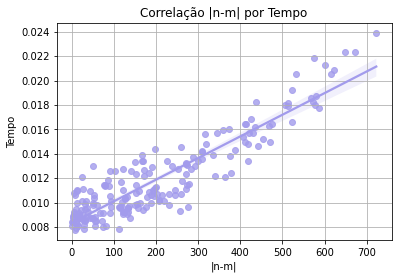

In [23]:
df_smith = df.loc[df['Algoritmo']=='Smith']
plot_corr(df_smith['|n-m|'],df_smith['Tempo'],"Correlação |n-m| por Tempo")

In [24]:
df_smith['Tempo'].corr(df_smith['|n-m|'])

0.9091558448917507